In [12]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torchvision
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
%matplotlib inline


In [2]:
# # THIS IS JUST FOR VIEWING IMAGES

# image_size = 512

# path_real = '200_images_brain/train/'
# img_names_real = os.listdir(path_real)

# path_fake = 'images/train/FAKE/'
# img_names_fake = os.listdir(path_fake)

# batch_size = 64


# X_train_real = []
# X_train_fake = []
# for i in range(batch_size):
#     name_real = img_names_real[i]
#     img_name = path_real + name_real
#     image = plt.imread(img_name)
#     X_train_real.append(image)

#     name_fake = img_names_fake[i]
#     img_name = path_fake + name_fake
#     image = plt.imread(img_name)
#     X_train_fake.append(image)

# X_train_real = np.array(X_train_real)
# X_train_fake = np.array(X_train_fake)
# print(f"Shape of training data: {X_train_real.shape}")
# print(f"Data type: {type(X_train_real)}")

FileNotFoundError: [Errno 2] No such file or directory: 'images/train/FAKE/'

In [13]:
# Actual Dataloader

base_path = "200_images_brain/"
batch_size = 64

tranform_tensor = transform = T.Compose([
    # you can add other transformations in this list
    T.ToTensor(),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.RandomAdjustSharpness(sharpness_factor=1.2, p=0.3)
])

tranform_j_tensor = transform = T.Compose([
    # you can add other transformations in this list
    T.ToTensor(),
    T.Resize((128, 128))
])

train_set = torchvision.datasets.ImageFolder(root=base_path + "train/", transform=tranform_j_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size,
                                           shuffle=True)

test_set = torchvision.datasets.ImageFolder(root=base_path + "test/", transform=tranform_j_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                           batch_size=batch_size,
                                           shuffle=False)




In [14]:
from model_2 import SegmentNet
from tqdm import tqdm



# initialize parameters
cnn = SegmentNet()
cnn.train()
iterations = 10
learning_rate = 0.005

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# Train the Model
for epoch in tqdm(range(iterations)):
    for i, (images, labels) in enumerate(train_loader):
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        
        labels = labels
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        if (i+1)%2 == 0:
            print("Epoch " + str(epoch+1) + "/" + str(iterations) + str(loss.data))


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10tensor(1.6084)
Epoch 1/10tensor(1.5987)
Epoch 1/10tensor(1.6002)
Epoch 1/10tensor(1.6046)
Epoch 1/10tensor(1.5897)
Epoch 1/10tensor(1.5790)
Epoch 1/10tensor(1.5982)


 10%|█         | 1/10 [01:44<15:39, 104.40s/it]

Epoch 2/10tensor(1.5719)
Epoch 2/10tensor(1.5887)
Epoch 2/10tensor(1.5893)
Epoch 2/10tensor(1.5748)
Epoch 2/10tensor(1.5622)
Epoch 2/10tensor(1.5667)
Epoch 2/10tensor(1.5803)


 20%|██        | 2/10 [03:21<13:37, 102.24s/it]

Epoch 3/10tensor(1.5854)
Epoch 3/10tensor(1.5568)
Epoch 3/10tensor(1.5707)
Epoch 3/10tensor(1.5859)
Epoch 3/10tensor(1.5862)
Epoch 3/10tensor(1.5600)
Epoch 3/10tensor(1.5734)


 30%|███       | 3/10 [09:41<21:39, 185.66s/it]

Epoch 4/10tensor(1.5756)
Epoch 4/10tensor(1.5413)
Epoch 4/10tensor(1.5756)
Epoch 4/10tensor(1.5648)
Epoch 4/10tensor(1.5883)
Epoch 4/10tensor(1.5760)
Epoch 4/10tensor(1.5735)


 40%|████      | 4/10 [11:36<16:26, 164.42s/it]

Epoch 5/10tensor(1.5490)
Epoch 5/10tensor(1.5839)
Epoch 5/10tensor(1.5462)
Epoch 5/10tensor(1.5570)
Epoch 5/10tensor(1.5577)
Epoch 5/10tensor(1.5799)
Epoch 5/10tensor(1.5575)


 50%|█████     | 5/10 [13:21<12:12, 146.49s/it]

Epoch 6/10tensor(1.5727)
Epoch 6/10tensor(1.5490)
Epoch 6/10tensor(1.5330)
Epoch 6/10tensor(1.5668)
Epoch 6/10tensor(1.5671)
Epoch 6/10tensor(1.5837)
Epoch 6/10tensor(1.5697)


 60%|██████    | 6/10 [15:09<09:00, 135.01s/it]

Epoch 7/10tensor(1.5682)
Epoch 7/10tensor(1.5549)
Epoch 7/10tensor(1.5657)
Epoch 7/10tensor(1.5439)
Epoch 7/10tensor(1.5688)
Epoch 7/10tensor(1.5517)
Epoch 7/10tensor(1.5863)


 70%|███████   | 7/10 [16:55<06:18, 126.24s/it]

Epoch 8/10tensor(1.5317)
Epoch 8/10tensor(1.5788)
Epoch 8/10tensor(1.5756)
Epoch 8/10tensor(1.5608)
Epoch 8/10tensor(1.5705)
Epoch 8/10tensor(1.5595)
Epoch 8/10tensor(1.5429)


 80%|████████  | 8/10 [18:34<03:56, 118.10s/it]

Epoch 9/10tensor(1.5360)
Epoch 9/10tensor(1.5409)
Epoch 9/10tensor(1.5556)
Epoch 9/10tensor(1.5691)
Epoch 9/10tensor(1.5838)
Epoch 9/10tensor(1.5425)
Epoch 9/10tensor(1.5755)


 90%|█████████ | 9/10 [20:19<01:54, 114.22s/it]

Epoch 10/10tensor(1.5466)
Epoch 10/10tensor(1.5391)
Epoch 10/10tensor(1.5438)
Epoch 10/10tensor(1.5444)
Epoch 10/10tensor(1.5515)
Epoch 10/10tensor(1.5622)
Epoch 10/10tensor(1.5486)


100%|██████████| 10/10 [21:59<00:00, 131.93s/it]


In [16]:
# # NEW MODELS

# from model import FakeNet
# from tqdm import tqdm



# # initialize parameters
# cnn = FakeNet()
# cnn.train()
# iterations = 20
# learning_rate = 0.001 

# criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# # Train the Model
# for epoch in tqdm(range(iterations)):
#     for i, (images, labels) in enumerate(train_loader):
        
#         # Forward + Backward + Optimize
#         optimizer.zero_grad()
#         outputs = cnn(images)
#         labels = labels.unsqueeze(1).float()
#         loss = criterion(outputs,labels)
#         loss.backward()
#         optimizer.step()

#         if (i+1)%31 == 0:
#             print("Epoch " + str(epoch+1) + "/" + str(iterations) + str(loss.data))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:16<?, ?it/s]


KeyboardInterrupt: 

In [18]:
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var)
correct = 0
total = 0

for images, labels in test_loader:
    outputs = cnn(images)
    predicted = torch.argmax(outputs.data, dim=1)
    # print(predicted)
    # print(labels)
    total += labels.size(0)
    print(labels)
    print(predicted)
    correct += (predicted.numpy().T == np.array(labels)).sum()
    if total % 256 == 0:
        print(correct)
        print(total)
print('Test Accuracy of the model on test images: %.6f%%' % (100.0*correct/total))


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3])
tensor([2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
tensor([2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2])
Test Accuracy of the model on test images: 22.000000%


In [19]:
# img_index = np.random.randint(10000, len(test_set))
# img_index = 4894
# img_index = 10755
# real_label = "Real" if img_index < 10000 else "Fake"
# predicted_label = torch.round(cnn(list_tl[img_index // 64][0]))[img_index % 64].detach().numpy()[0]
# predicted_label = "Real" if predicted_label < 0.5 else "Fake"

# plt.imshow(test_imgs[img_index])
# plt.title("Actual Label: " + real_label + "\nPredicted Label: "
#           + predicted_label + "\nImage Number: " + str(img_index))


ValueError: low >= high

Text(0.5, 1.0, 'Image Number Fake: 9')

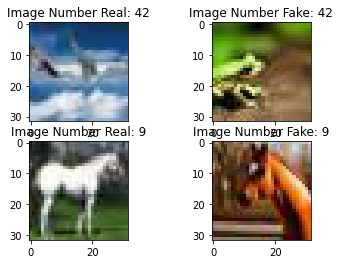

In [6]:
img_index = np.random.randint(0, batch_size)
img_2_index = np.random.randint(0, batch_size)


figure, axis = plt.subplots(2, 2) 

axis[0, 0].imshow(X_train_real[img_index], interpolation='nearest')
axis[0, 0].set_title("Image Number Real: " + str(img_index)) 
  
axis[0, 1].imshow(X_train_fake[img_index], interpolation='nearest')
axis[0, 1].set_title("Image Number Fake: " + str(img_index)) 
  
axis[1, 0].imshow(X_train_real[img_2_index], interpolation='nearest')
axis[1, 0].set_title("Image Number Real: " + str(img_2_index)) 
  
axis[1, 1].imshow(X_train_fake[img_2_index], interpolation='nearest')
axis[1, 1].set_title("Image Number Fake: " + str(img_2_index)) 
